In [1]:
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

from function.utilities import get_subset
from function.seqfilter import SeqFilter

# Param

In [76]:
#####CHANGE HERE#####
algorithm = "fldpnn" #VLXT, VSL2, VL3-BA, fldpnn
#####CHANGE HERE#####

In [77]:
protein_subset = ["human", "rbp", "mrbp", "trbp", "snrbp", "snorbp", "ncrbp", "rrbp", "ribosomerbp"]

plot_subset = ['>=30','>=40','>=50'] #'>=20', '>=30', '>=40', '>=50', '>=60' 
table_s1_path = Path('./output/table_s1')

# Load data

In [78]:
pondr_disorder_ident_path = Path("./output/pondr_disorder_ident")

od_human_df = pd.read_pickle(pondr_disorder_ident_path / "{}_od_human_df.pkl".format(algorithm))
# od_rbp_df = get_subset(od_human_df, "rbp")
# od_mrbp_df = get_subset(od_human_df, "mrbp")

In [79]:
od_human_df

,uniprot_id,order_sequence,disorder_sequence,od_ident,warning
0,A0A024RBG1,************DREGFKKRAACLCFRSEQEDEVLLVSSSRYPD*W...,MMKFKPNQTRTY********************************Q*...,1111111111110000000000000000000000000000000010...,0
1,A0A075B6H7,MEAPAQLLFLLLLWLPDTTREIVMTQSPPTLSLSPGERVTLSCRAS...,**********************************************...,0000000000000000000000000000000000000000000000...,0
2,A0A075B6H8,MDMRVPAQLLGLLLLWLPGVRFDIQMTQSPSFLSASVGDRVSIICW...,**********************************************...,0000000000000000000000000000000000000000000000...,0
3,A0A075B6H9,MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...,**********************************************...,0000000000000000000000000000000000000000000000...,0
4,A0A075B6I0,MSVPTMAWMMLLLGLLAYGSGVDSQTVVTQEPSFSVSPGGTVTLTC...,**********************************************...,0000000000000000000000000000000000000000000000...,0
...,...,...,...,...,...
20287,Q9GZY0,***TLKKCGTYRTEVAECHDHGSTFQ*RKKGGSS***N********...,MCS***********************G*******FRD*FDKRSCHY...,1110000000000000000000000010000000111011111111...,0
20288,Q5JQF8,MASLYVGDLHPEVTEAMLYEKFSPAGPILSIRICRDKITRRSLGYA...,**********************************************...,0000000000000000000000000000000000000000000000...,0
20289,Q15415,MVEADHPGKLFIGGLNRETNEKMLKAVFGKHGPISEVLLIKDRTSK...,**********************************************...,0000000000000000000000000000000000000000000000...,0
20290,P32969,MKTILSNQTVDIPENVDITLKGRTVIVKGPRGTLRRDFNHINVELS...,**********************************************...,0000000000000000000000000000000000000000000000...,0


# Consecutive disordered stat

In [80]:
def length_filter(disorder_length, od_ident):
    """
    filter disorder length longer than disorder_length
    
    disorder_length: int, 
    od_ident: str, order/disorder indication seq, 1 is disorder, 0 is order
    """
    count = 0
    for i in od_ident:
        if i == "1":
            count = count + 1
            if count >= disorder_length:
                return 1
        else:
            count = 0
    return 0

def make_consecutive_disorder_stat(df):
    
    #count sequences which disorder length are longer than condition
    df[">=20"] = df["od_ident"].apply(lambda x: length_filter(20, x))
    df[">=30"] = df["od_ident"].apply(lambda x: length_filter(30, x))
    df[">=40"] = df["od_ident"].apply(lambda x: length_filter(40, x))
    df[">=50"] = df["od_ident"].apply(lambda x: length_filter(50, x))
    df[">=60"] = df["od_ident"].apply(lambda x: length_filter(60, x))

    b20 = df[">=20"].value_counts()[1] / len(df)
    b30 = df[">=30"].value_counts()[1] / len(df)
    b40 = df[">=40"].value_counts()[1] / len(df)
    b50 = df[">=50"].value_counts()[1] / len(df)
    b60 = df[">=60"].value_counts()[1] / len(df)

    b20 = round(b20 * 100, 1)
    b30 = round(b30 * 100, 1)
    b40 = round(b40 * 100, 1)
    b50 = round(b50 * 100, 1)
    b60 = round(b60 * 100, 1)

    return {">=20": b20,
            ">=30": b30, 
            ">=40": b40, 
            ">=50": b50,
            ">=60": b60,}

In [81]:
output = {}
for i in protein_subset:
    od_subset_df = get_subset(od_human_df, i)
    od_stat = make_consecutive_disorder_stat(od_subset_df)
    
    output['algorithm'] = algorithm
    output[i] = {"subset":i,
                 "nums": len(od_subset_df),
                 "stat":od_stat}

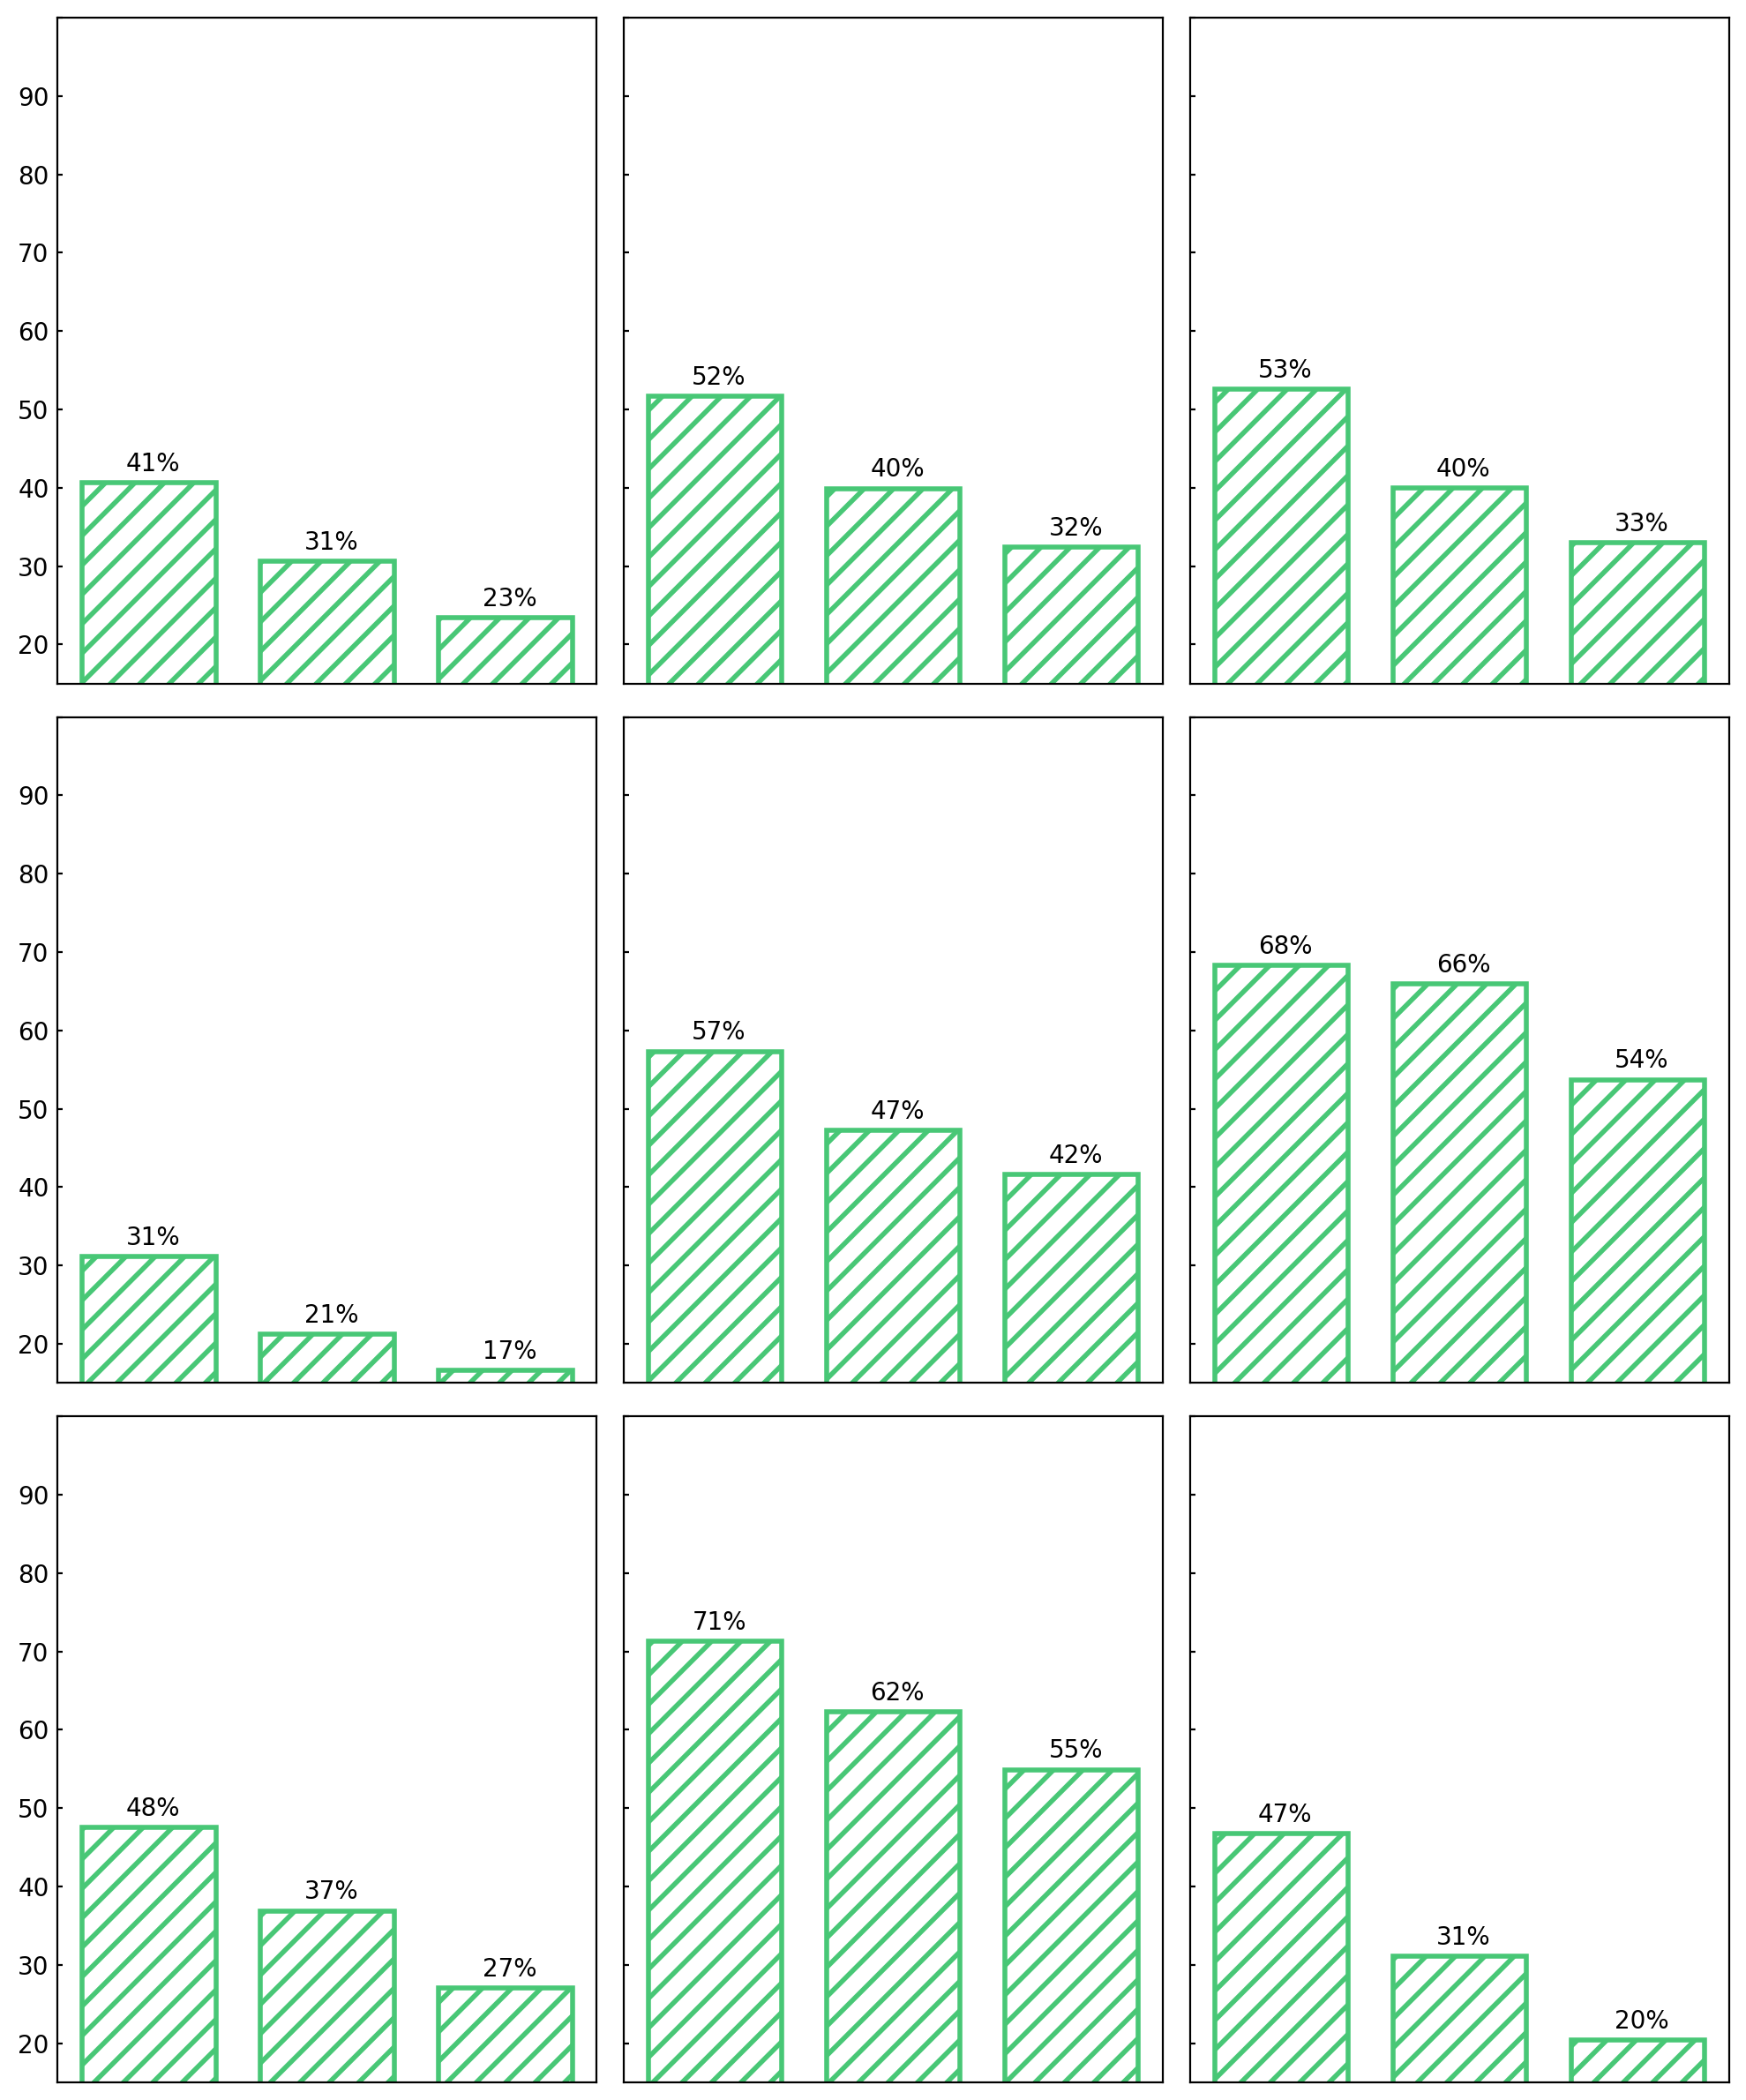

In [86]:
#PLOT BATCH
def plot(subset, subplot):
    
    plot_data = [output[subset]['stat'][x] for x in plot_subset]
    
    
    subplot.bar(X, plot_data, width=0.75, tick_label=plot_subset, color="white", hatch="//", linewidth=2, edgecolor="#48c776")
    for x, y in zip(X,plot_data):
        subplot.text(x-0.13, y+1.5, "{}%".format(str(round(y))),fontsize=10)
    
#     subplot.set_title("{} nums:{}".format(output[subset]['subset'], output[subset]['nums']))
    subplot.set_ylim(15,100)
    subplot.tick_params(which='major', axis="x",direction="in", length=0)
    subplot.tick_params(which='minor', axis="x",direction="in", length=0)
    subplot.tick_params(which='major', axis="y",direction="in", length=2)
    subplot.tick_params(which='minor', axis="y",direction="in", length=2)
    subplot.axes.xaxis.set_ticklabels([])
    yticks = subplot.axes.yaxis.get_major_ticks()
    yticks[-1].label.set_visible(False)

    
    
mpl.rcParams["hatch.linewidth"] = 2
f, ((a0, a1, a2), (a3, a4, a5), (a6, a7, a8)) = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 12), dpi=200)

X = np.arange(0, len(plot_subset))


for subset, subplot in zip(protein_subset,[a0,a1,a2,a3,a4,a5,a6,a7,a8]):
    plot(subset, subplot)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)
figure_1a_path = Path("/home/wenlin/tmp/fig1a")
output_path = figure_1a_path / "fig1a_{}.svg".format(algorithm)
f.savefig(output_path)